# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [1]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

from agents.agent import DDPG

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = DDPG(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

state = agent.reset_episode()
# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act(state)
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

/Users/Syed.Farooq/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


simpose [ 0.          0.         10.0019423   1.10134436  0.32180855  0.        ]
simpose [-1.23482514e-03  3.30300220e-03  1.00055406e+01  2.15855349e+00
  5.04182881e-01  0.00000000e+00]
simpose [-5.59032222e-03  1.27536412e-02  1.00049957e+01  3.14372588e+00
  1.55048683e-01  0.00000000e+00]
simpose [-0.01243486  0.02504239  9.99477507  4.03164978  5.27861706  0.        ]
simpose [-0.01658834  0.03570002  9.97545186  4.80484981  3.17294818  0.        ]
simpose [-0.01732526  0.04861538  9.9505177   5.45190853  0.14057477  0.        ]
simpose [-0.01848407  0.06257258  9.92388416  5.97014548  2.58944489  0.        ]
simpose [-0.02222552  0.07470936  9.89276492  0.07659814  4.40763631  0.        ]
simpose [-0.02427704  0.08777472  9.85341558  0.34471455  5.76793025  0.        ]
simpose [-0.02069082  0.10188336  9.81217167  0.50176336  0.53133648  0.        ]
simpose [-0.01716545  0.11872772  9.77313087  0.56192098  1.37847757  0.        ]
simpose [-0.01944268  0.13755552  9.73374396  0.

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

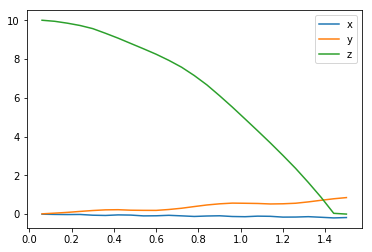

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

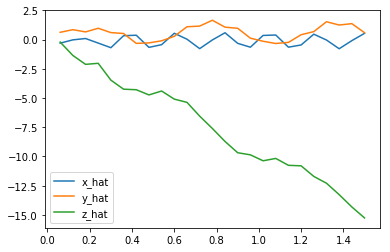

In [3]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

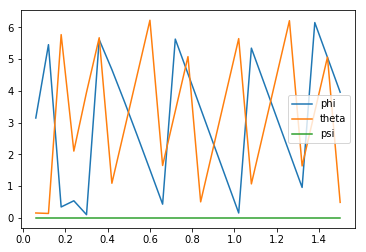

In [4]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

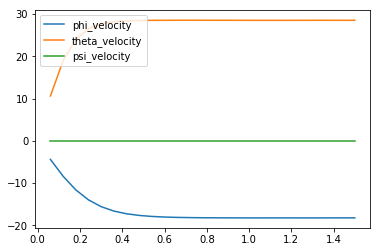

In [5]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

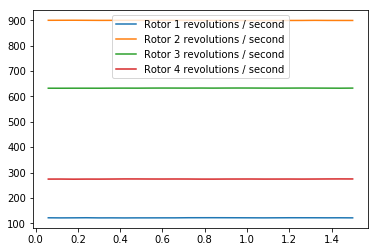

In [6]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [7]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[-0.17840122  0.85114136  0.          3.95623431  0.48947332  0.        ]
[  0.52655107   0.581396   -15.24978148]
[-18.25501856  28.53594257   0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [44]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
# Make sure to change from notebook to inline after your tests
%matplotlib inline
import time

class AnimatedPlot():
    def __init__(self):
        """Initialize parameters"""
        self.X, self.Y, self.Z = [], [], []

        self.fig = plt.figure(figsize = (14,8))
        self.ax = self.fig.add_subplot(111, projection='3d')

    def plot(self, task, i_episode=None):
        pose = task.sim.pose[:3]
        self.X.append(pose[0])
        self.Y.append(pose[1])
        self.Z.append(pose[2])
        self.ax.clear()
        if i_episode:
            plt.title("Episode {}".format(i_episode))

        if len(self.X)>1:
            self.ax.scatter(self.X[:-1], self.Y[:-1], self.Z[:-1], c='k', alpha=0.3)
        if task.sim.done and task.sim.runtime > task.sim.time:
            # Colision
            self.ax.scatter(pose[0], pose[1], pose[2], c='r', marker='*', linewidths=5)
        else:
            self.ax.scatter(pose[0], pose[1], pose[2], c='k', marker='s', linewidths=5)

        self.fig.canvas.draw()
        plt.pause(0.5)

In [51]:
import sys
import pandas as pd
from agents.agent import DDPG
from task import Task
    
init_pose = np.array([0., 0., 10., 0., 0., 0.])
num_episodes = 1000
target_pos = np.array([10., 10., 0.])
task = Task(init_pose = init_pose, target_pos=target_pos)
agent = DDPG(task) 

best_score = 0
average_score = 0

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    score = 0
    
    # Initialize visualization class    
#     animplot = AnimatedPlot()

    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        score += reward
        agent.step(action, reward, next_state, done)
        state = next_state
        
        # Visualize Quadcopter
#         animplot.plot(task)
        if done:
            if score > best_score:
                best_score = score
            average_score = (average_score * (i_episode - 1) + score) / i_episode
            print('position', state)
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}, average_score = {:7.3f})".format(
                i_episode, score, best_score, average_score), end="")  # [debug]
            break
    sys.stdout.flush()

position [-5.96790973 -0.39561061  0.14187876  1.67635201  4.82639127  0.
 -6.02789911 -0.39279271  0.          2.31285779  4.97717988  0.
 -6.08127177 -0.38811591  0.          2.87714907  5.04868694  0.        ]
Episode =    1, score =  62.726 (best =  62.726, average_score =  62.726)position [-6.01527467 -0.52079797  0.17659751  1.9189832   5.24996317  0.
 -6.08537564 -0.52512759  0.          2.68581793  5.43222459  0.
 -6.15066584 -0.52612286  0.          3.3297417   5.52250881  0.        ]
Episode =    2, score =  62.722 (best =  62.726, average_score =  62.724)position [23.46416038 48.07014332 16.10196204  1.53586017  5.74793484  0.
 23.75584926 48.65084263 15.94469844  1.50633464  5.1712423   0.
 24.04613456 49.23086479 15.78432249  1.47688875  4.59458284  0.        ]
Episode =    3, score = 179.350 (best = 179.350, average_score = 101.599)position [-6.47343003 -0.10464377  0.20305242  1.64594245  4.97708059  0.
 -6.55797495 -0.08902588  0.          1.66559031  4.40096357  0.
 -6

Episode =   28, score =  65.179 (best = 179.350, average_score =  76.941)position [-34.73280269   2.26609508   0.98799245   5.78803374   2.01151249
   0.         -35.01734967   2.32869527   0.4745293    5.7783025
   1.23030968   0.         -35.31108324   2.39189752   0.
   5.76851695   5.78798718   0.        ]
Episode =   29, score = 102.607 (best = 179.350, average_score =  77.826)position [-14.81529115   0.38645864   0.59627916   6.25192067   4.01946038
   0.         -14.88736707   0.40016      0.13833581   6.25380881
   2.86648747   0.         -14.95419457   0.41399644   0.
   6.25567178   0.70721775   0.        ]
Episode =   30, score =  66.286 (best = 179.350, average_score =  77.442)position [6.6986404  0.26278392 0.21800688 0.03963187 3.93040564 0.
 6.85095944 0.26776547 0.         0.04298395 3.79940975 0.
 7.01260069 0.27231822 0.         0.04645013 3.66899964 0.        ]
Episode =   31, score =  76.198 (best = 179.350, average_score =  77.401)position [-8.22629548 -0.02957379 

Episode =   56, score =  48.004 (best = 179.350, average_score =  75.645)position [-7.87302881e+00 -2.75940872e-03  0.00000000e+00  6.19831006e+00
  2.39194661e+00  0.00000000e+00 -7.98358273e+00 -4.61822814e-03
  0.00000000e+00  6.19430363e+00  2.96545174e+00  0.00000000e+00
 -8.09879200e+00 -5.66834281e-03  0.00000000e+00  6.19024533e+00
  3.53905537e+00  0.00000000e+00]
Episode =   57, score =  84.192 (best = 179.350, average_score =  75.795)position [-6.79695794 -0.31785847  0.          5.914032    4.64566331  0.
 -7.00605235 -0.33245418  0.          5.90452813  2.01086093  0.
 -7.21382122 -0.34681542  0.          5.89489458  4.53635546  0.        ]
Episode =   58, score =  60.818 (best = 179.350, average_score =  75.536)position [-9.36167718 -0.16296979  0.2618629   0.13140211  0.41490863  0.
 -9.46357549 -0.16317215  0.          0.13396476  5.23432065  0.
 -9.56362483 -0.16235211  0.          0.13659817  3.53893439  0.        ]
Episode =   59, score =  60.306 (best = 179.350, ave

Episode =   83, score = 105.837 (best = 179.350, average_score =  74.471)position [-2.33103280e+01 -1.98001565e-02  0.00000000e+00  6.19283099e+00
  2.98635573e+00  0.00000000e+00 -2.36956218e+01 -2.11102871e-02
  0.00000000e+00  6.19180319e+00  3.56276275e+00  0.00000000e+00
 -2.40754417e+01 -2.13937044e-02  0.00000000e+00  6.19093222e+00
  4.13924944e+00  0.00000000e+00]
Episode =   84, score =  57.753 (best = 179.350, average_score =  74.272)position [-3.42488317  0.01710796  0.47750475  6.26986987  4.76365766  0.
 -3.62495521  0.01788025  0.05481993  6.2695668   4.81577362  0.
 -3.80909256  0.01858521  0.          6.26933771  4.86931716  0.        ]
Episode =   85, score =  28.288 (best = 179.350, average_score =  73.731)position [16.47392055 -1.92355091  8.97899112  5.4604427   4.49016368  0.
 16.56768909 -2.00290885  8.45510059  5.45573887  1.51928538  0.
 16.66117841 -2.08395476  7.92294244  5.45106226  3.45578289  0.        ]
Episode =   86, score = 177.232 (best = 179.350, ave

Episode =  111, score =  56.465 (best = 179.350, average_score =  75.559)position [-3.47641676  2.78917861  0.40992267  4.29651398  0.09409593  0.
 -3.5401264   2.76539975  0.09786376  4.87322393  0.67015612  0.
 -3.60732234  2.73411323  0.          5.44996246  1.24619348  0.        ]
Episode =  112, score =  58.800 (best = 179.350, average_score =  75.410)position [-0.20803575  0.56669409  0.24037402  1.51428581  2.28512544  0.
 -0.18702256  0.58360427  0.01011344  2.09082329  2.02660456  0.
 -0.17326985  0.5959858   0.          2.66730461  1.07288272  0.        ]
Episode =  113, score =  63.105 (best = 179.350, average_score =  75.301)position [ 3.54869818 -5.00867181  0.43976853  2.5792573   2.09835804  0.
  3.61195557 -5.20974004  0.17963775  3.1564595   1.52157696  0.
  3.66644874 -5.41069523  0.          3.7336787   0.94480854  0.        ]
Episode =  114, score =  56.637 (best = 179.350, average_score =  75.137)position [-5.7002686   1.86501381  0.          2.4164417   5.87074049

Episode =  140, score =  54.613 (best = 179.350, average_score =  71.534)position [-4.55025931  1.49449405  0.09257442  2.6065596   0.99377701  0.
 -4.69488477  1.52212366  0.          3.18337932  0.890304    0.
 -4.84088345  1.55006119  0.          3.76015102  0.78869912  0.        ]
Episode =  141, score =  56.562 (best = 179.350, average_score =  71.428)position [ 3.94902832 -1.15144101  0.          2.63101675  2.38275221  0.
  4.02975893 -1.17685612  0.          3.20805189  2.26940731  0.
  4.1090453  -1.20246456  0.          3.78513459  2.15781541  0.        ]
Episode =  142, score =  56.779 (best = 179.350, average_score =  71.324)position [-4.95737111  1.3839106   0.          2.39577426  1.87927807  0.
 -5.03937441  1.39955068  0.          2.97275406  3.98505631  0.
 -5.12322242  1.41374985  0.          3.54976785  5.26860419  0.        ]
Episode =  143, score =  56.454 (best = 179.350, average_score =  71.220)position [1.9591209  0.65843111 0.23387726 6.09993061 2.98076157 0.
 

Episode =  169, score =  58.738 (best = 180.785, average_score =  70.215)position [1.5672421  2.44294946 0.         3.24320409 0.93417791 0.
 1.57538655 2.44370615 0.         3.82004341 2.07025438 0.
 1.57593388 2.44616504 0.         4.39690361 2.97331949 0.        ]
Episode =  170, score =  65.598 (best = 180.785, average_score =  70.188)position [ 0.1987875  -2.20521578  0.          0.8760857   5.89928765  0.
  0.20822673 -2.25986     0.          1.45266235  1.16878206  0.
  0.21351191 -2.30880945  0.          2.02920862  2.47261231  0.        ]
Episode =  171, score =  54.417 (best = 180.785, average_score =  70.096)position [ 2.83034016 -0.57335128  0.16891481  4.3115261   6.25377506  0.
  2.98362218 -0.57921352  0.          4.88803869  0.02503672  0.
  3.13641363 -0.59840683  0.          5.46457484  0.07882048  0.        ]
Episode =  172, score =  58.833 (best = 180.785, average_score =  70.030)position [ 1.65292276 -3.04722003  0.13245832  2.0010627   5.98108327  0.
  1.7418535  

Episode =  198, score =  52.033 (best = 180.785, average_score =  68.198)position [-0.24548482  3.66288213  0.          0.80273242  5.52086659  0.
 -0.23886676  3.74958298  0.          1.37944188  5.42400179  0.
 -0.22192406  3.843978    0.          1.95614422  5.32888665  0.        ]
Episode =  199, score =  54.598 (best = 180.785, average_score =  68.130)position [0.9057143  3.80539824 0.         0.86805331 4.65895888 0.
 1.1754748  3.87046378 0.         1.44489493 4.62694398 0.
 1.45622004 3.93441327 0.         2.02172291 4.59527667 0.        ]
Episode =  200, score =  54.528 (best = 180.785, average_score =  68.062)position [-5.45615058 -2.1330871   0.          4.9648713   3.86622545  0.
 -5.56062211 -2.21051318  0.          5.54127142  4.22897072  0.
 -5.65455653 -2.28203192  0.          6.11767953  4.57372794  0.        ]
Episode =  201, score =  67.203 (best = 180.785, average_score =  68.058)position [-1.0009506   2.07577195  0.54142633  1.98942813  3.61873421  0.
 -1.01116538 

Episode =  227, score =  56.412 (best = 180.785, average_score =  67.192)position [-1.85402306  7.28021201  0.36257662  2.61430293  5.75980993  0.
 -1.89192666  7.42784883  0.01974652  3.19100521  0.05288955  0.
 -1.92904772  7.57702556  0.          3.76770808  0.62932934  0.        ]
Episode =  228, score =  56.801 (best = 180.785, average_score =  67.147)position [-4.10428214  5.22203746  0.1600474   2.12099754  1.9086575   0.
 -4.0734217   5.33338839  0.          2.69784818  2.93910458  0.
 -4.04752825  5.44171339  0.          3.27470925  3.77611397  0.        ]
Episode =  229, score =  71.835 (best = 180.785, average_score =  67.167)position [0.93389685 2.58700137 0.15975067 5.45967147 5.16603472 0.
 1.03763695 2.6469957  0.         6.03609484 5.27124331 0.
 1.15304066 2.70267818 0.         0.32932208 5.37385272 0.        ]
Episode =  230, score =  52.397 (best = 180.785, average_score =  67.103)position [-3.17147701  0.31731357  0.          3.25033882  4.24426079  0.
 -3.27089587 

Episode =  256, score =  54.805 (best = 180.785, average_score =  66.813)position [2.46323676 2.56777422 0.52364133 4.33160597 5.86278467 0.
 2.55390579 2.57846171 0.25545145 4.90838389 0.54789588 0.
 2.64371385 2.5775549  0.         5.48514929 1.12320737 0.        ]
Episode =  257, score =  58.979 (best = 180.785, average_score =  66.783)position [3.52139707 5.56469144 0.13267763 1.43154085 0.32829388 0.
 3.61265163 5.69753622 0.         2.00828202 3.2343873  0.
 3.7027336  5.83123029 0.         2.58501918 1.39362763 0.        ]
Episode =  258, score =  63.507 (best = 180.785, average_score =  66.770)position [1.73045831 6.8322187  0.16625556 4.99082417 0.69204237 0.
 1.76087338 6.97601355 0.         5.567347   5.52673073 0.
 1.79079373 7.11463869 0.         6.14389537 2.9715573  0.        ]
Episode =  259, score =  67.800 (best = 180.785, average_score =  66.774)position [-2.87375883  6.09629823  0.16210996  3.20628039  4.68936568  0.
 -2.90583795  6.11493242  0.          3.78310153 

Episode =  285, score = 155.941 (best = 180.785, average_score =  67.961)position [ -9.88593635   0.88070466   0.70742553   3.92829972   2.45473419
   0.         -10.00755947   0.85079552   0.34536593   4.50462968
   4.3820687    0.         -10.12723426   0.82570997   0.
   5.08094321   5.8130508    0.        ]
Episode =  286, score = 158.701 (best = 180.785, average_score =  68.278)position [-4.23118093  6.0172758   0.          4.88023875  1.95286439  0.
 -4.27415196  6.09581374  0.          5.45664818  2.52905937  0.
 -4.32228733  6.17662935  0.          6.03310863  3.10522603  0.        ]
Episode =  287, score = 127.484 (best = 180.785, average_score =  68.485)position [-4.8884852  19.40246245 20.27796186  2.95963731  2.38579465  0.
 -4.91753139 19.65505601 20.34366463  3.53655377  2.96320386  0.
 -4.95065807 19.90980724 20.41271399  4.1134526   3.5406281   0.        ]
Episode =  288, score = 181.047 (best = 181.047, average_score =  68.876)position [-11.75924004   7.73917522   4.95

Episode =  314, score =  60.801 (best = 181.047, average_score =  68.872)position [-2.80423618  0.51216177  0.17456674  3.63605214  0.59210109  0.
 -2.85440788  0.5108363   0.          4.21286724  1.17031501  0.
 -2.91089244  0.5073145   0.          4.78967429  1.74533487  0.        ]
Episode =  315, score =  50.034 (best = 181.047, average_score =  68.812)position [-0.79649178  0.56849028  0.28998955  2.59574433  5.87781316  0.
 -0.79865971  0.5856491   0.          3.17246363  0.17115841  0.
 -0.80015027  0.60450531  0.          3.74916839  0.74768029  0.        ]
Episode =  316, score =  56.577 (best = 181.047, average_score =  68.773)position [0.28287773 8.58397187 0.46909041 3.28055414 1.9232908  0.
 0.28386072 8.8176807  0.22927359 3.85724668 2.50035619 0.
 0.27763692 9.05595404 0.         4.43393882 3.07743306 0.        ]
Episode =  317, score =  65.642 (best = 181.047, average_score =  68.763)position [-0.1635443  -2.812882    0.63378719  0.27074458  2.67540771  0.
 -0.18443496 

Episode =  343, score =  63.151 (best = 181.047, average_score =  68.100)position [-3.08493853  3.24707697  0.16666276  4.96902866  4.68079516  0.
 -3.12247771  3.33764169  0.02198472  5.54584355  5.25755593  0.
 -3.15139199  3.42644808  0.          6.12261723  5.83431166  0.        ]
Episode =  344, score =  67.521 (best = 181.047, average_score =  68.099)position [-3.53253033  0.86080924  0.47880338  2.57571044  4.91347529  0.
 -3.60079089  0.81341666  0.17752201  3.15240905  5.48933483  0.
 -3.66198451  0.76723913  0.          3.72908478  6.06541023  0.        ]
Episode =  345, score =  56.540 (best = 181.047, average_score =  68.065)position [4.99227337 2.20912718 0.00522636 2.60434875 0.39995964 0.
 5.09281892 2.27017998 0.         3.18088488 0.97558221 0.
 5.18702787 2.332987   0.         3.75747676 1.54959958 0.        ]
Episode =  346, score =  56.924 (best = 181.047, average_score =  68.033)position [-0.07136517  2.54911071  0.53799792  2.59419595  0.44185307  0.
 -0.05292713 

Episode =  372, score =  61.080 (best = 181.047, average_score =  67.246)position [-1.09147769  7.41876468  0.25361204  4.92887911  4.1528864   0.
 -1.12270881  7.61677951  0.08093151  5.50540938  4.72961598  0.
 -1.14488498  7.81614231  0.          6.08195642  5.30634679  0.        ]
Episode =  373, score =  67.825 (best = 181.047, average_score =  67.247)position [-2.8081515   1.39162655  0.55023337  4.34817963  0.7735486   0.
 -2.84536429  1.36906114  0.22049036  4.9248844   1.34996918  0.
 -2.89051357  1.34259584  0.          5.50162376  1.92647589  0.        ]
Episode =  374, score =  58.727 (best = 181.047, average_score =  67.224)position [0.45943356 0.99009948 0.         6.0609578  3.21634696 0.
 0.46560221 1.00127133 0.         0.35451231 3.79249022 0.
 0.47436574 1.01193943 0.         0.93123352 4.36880705 0.        ]
Episode =  375, score =  61.045 (best = 181.047, average_score =  67.208)position [0.14152129 3.18467321 0.36247786 4.29763507 3.3193695  0.
 0.1322118  3.33230

Episode =  401, score =  76.046 (best = 181.047, average_score =  67.623)position [-3.15749768 20.46718943  0.15624749  0.72075909  5.94953674  0.
 -3.165674   20.80931857  0.          1.29702676  0.24307429  0.
 -3.17308725 21.15577568  0.          1.87326584  0.81981886  0.        ]
Episode =  402, score = 117.743 (best = 181.047, average_score =  67.748)position [ 1.30353115 12.54317645  0.          4.27130341  2.7479417   0.
  1.30391293 12.85880844  0.          4.84847117  3.32453866  0.
  1.30311734 13.18046252  0.          5.42564147  3.90115125  0.        ]
Episode =  403, score =  59.340 (best = 181.047, average_score =  67.727)position [-4.43519138  6.83126345  2.77394316  2.42465008  2.261611    0.
 -4.46461668  6.94208885  2.81524064  3.00130986  2.83847035  0.
 -4.49921421  7.0504663   2.85965636  3.57790903  3.41533111  0.        ]
Episode =  404, score = 183.015 (best = 183.015, average_score =  68.012)position [ 2.60252338 18.50558272  0.03893234  5.62655278  4.20890028

Episode =  429, score = 178.510 (best = 183.015, average_score =  70.706)position [-3.34457994 -4.85632477 36.56205923  2.37378741  2.40531589  0.
 -3.36759507 -4.90826356 36.74539904  2.95053146  2.98192324  0.
 -3.39412588 -4.96319457 36.93112597  3.52726402  3.55852049  0.        ]
Episode =  430, score = 177.029 (best = 183.015, average_score =  70.954)position [-3.2259073   3.1405698  36.87979976  2.36107983  2.39452698  0.
 -3.24815936  3.13630403 37.06387207  2.93787958  2.9713869   0.
 -3.27415834  3.12897987 37.25047193  3.51466326  3.54820048  0.        ]
Episode =  431, score = 178.166 (best = 183.015, average_score =  71.202)position [-3.30144694  0.4314907  36.6197725   2.41352139  2.45704382  0.
 -3.32461383  0.4060304  36.80332064  2.99011069  3.03384214  0.
 -3.35097017  0.37773497 36.9895714   3.56666112  3.61065523  0.        ]
Episode =  432, score = 177.856 (best = 183.015, average_score =  71.449)position [-3.16685862  3.07327529 36.91865737  2.35305591  2.38729314

Episode =  458, score =  54.462 (best = 183.015, average_score =  75.723)position [ 0.48833153 -0.44756074  0.43718964  0.88267718  0.73040782  0.
  0.51602728 -0.4643618   0.13516322  1.45938352  0.8711018   0.
  0.54065367 -0.47920505  0.          2.03609139  1.00664941  0.        ]
Episode =  459, score =  54.401 (best = 183.015, average_score =  75.676)position [-2.81438526e-02  2.41412692e+00  0.00000000e+00  4.32641812e+00
  5.03346738e+00  0.00000000e+00  1.78502228e-03  2.45552026e+00
  0.00000000e+00  4.90311415e+00  5.18788070e+00  0.00000000e+00
  3.60724774e-02  2.49516122e+00  0.00000000e+00  5.47978152e+00
  5.33596918e+00  0.00000000e+00]
Episode =  460, score =  58.894 (best = 183.015, average_score =  75.640)position [0.09272112 1.91722236 0.11858678 4.32415082 4.07901404 0.
 0.09631924 1.93639779 0.         4.90117004 4.1828382  0.
 0.10395297 1.95812113 0.         5.47817932 4.28403182 0.        ]
Episode =  461, score =  58.871 (best = 183.015, average_score =  75.6

Episode =  487, score =  63.204 (best = 183.015, average_score =  75.014)position [0.41575128 4.53971304 0.         4.2941129  3.74527414 0.
 0.41799655 4.65825338 0.         4.87101193 4.3218614  0.
 0.42750539 4.78224891 0.         5.44793441 4.89846209 0.        ]
Episode =  488, score =  59.005 (best = 183.015, average_score =  74.981)position [-3.16146106  7.65242018 36.7412083   2.39608324  2.36612214  0.
 -3.18306073  7.68662951 36.92393551  2.97313593  2.94269978  0.
 -3.20870748  7.7181102  37.10936047  3.55018114  3.51926026  0.        ]
Episode =  489, score = 178.768 (best = 183.015, average_score =  75.193)position [-3.23743091  1.58058939 36.75873316  2.34668619  2.37953164  0.
 -3.25962569  1.56283127 36.94249577  2.92337932  2.95630182  0.
 -3.28564913  1.54194588 37.12865897  3.50007076  3.53306113  0.        ]
Episode =  490, score = 178.009 (best = 183.015, average_score =  75.403)position [-2.86429849 38.70885291 29.96647505  2.38145323  2.10054076  0.
 -2.88037908 

Episode =  515, score =  58.579 (best = 183.015, average_score =  75.258)position [-4.05547796  5.48179518  0.55719034  0.3904666   3.07552971  0.
 -4.09894473  5.51009943  0.188435    0.96732316  3.65245581  0.
 -4.14025017  5.53354123  0.          1.54418799  4.22935282  0.        ]
Episode =  516, score =  69.568 (best = 183.015, average_score =  75.247)position [-4.23810934 -0.86872029  0.48488423  6.0992531   2.5007447   0.
 -4.30936544 -0.88458594  0.20563198  0.39294344  6.14437168  0.
 -4.3832189  -0.89768229  0.          0.96982571  2.31758612  0.        ]
Episode =  517, score =  60.708 (best = 183.015, average_score =  75.219)position [1.08641429 1.6913933  0.12372461 4.97911489 5.2769176  0.
 1.13118323 1.69706462 0.         5.55569857 5.5265915  0.
 1.17903593 1.69968711 0.         6.1322629  5.75854761 0.        ]
Episode =  518, score =  67.541 (best = 183.015, average_score =  75.204)position [-3.09394665  4.8703425  36.9266344   2.41869131  2.40340085  0.
 -3.11578834 

Episode =  544, score =  73.873 (best = 183.015, average_score =  78.023)position [ 0.41383494 -0.88125991  0.08016896  3.67391142  5.3664999   0.
  0.42266779 -0.91866164  0.          4.25067102  2.2006562   0.
  0.43090155 -0.95453276  0.          4.82742205  4.52383943  0.        ]
Episode =  545, score =  50.091 (best = 183.015, average_score =  77.971)position [-0.3795769   8.24422418  0.63598289  6.04703892  4.00951743  0.
 -0.39217827  8.48307705  0.31086082  0.34043228  4.58576238  0.
 -0.39651013  8.72083715  0.          0.91703382  5.16198395  0.        ]
Episode =  546, score =  61.120 (best = 183.015, average_score =  77.941)position [-3.27163892  4.09971159 36.74801711  2.3742977   2.41502405  0.
 -3.29423491  4.0987938  36.93169702  2.95099963  2.99195963  0.
 -3.32042815  4.09486173 37.11800389  3.52770374  3.56890019  0.        ]
Episode =  547, score = 178.335 (best = 183.015, average_score =  78.124)position [-3.22930541  3.77842801 36.68440316  2.42362408  2.40801911

Episode =  573, score =  91.568 (best = 183.015, average_score =  80.631)position [-0.20946974  2.90951163  0.51723491  3.87655729  5.77938289  0.
 -0.21693184  2.96260411  0.23503722  4.45343576  1.58145668  0.
 -0.22723251  3.01382995  0.          5.03033536  3.12457674  0.        ]
Episode =  574, score =  74.055 (best = 183.015, average_score =  80.619)position [-3.34610129 -3.24686652 36.51659304  2.38304579  2.41103167  0.
 -3.36911504 -3.29623534 36.69961149  2.96008138  2.98755426  0.
 -3.39560919 -3.34855027 36.88506879  3.537077    3.56406124  0.        ]
Episode =  575, score = 177.365 (best = 183.015, average_score =  80.787)position [-3.17763757  4.79272539 36.87921521  2.41688604  2.42801375  0.
 -3.20000677  4.80687057 37.0632709   2.9936399   3.00514547  0.
 -3.22589123  4.81826907 37.25013644  3.57039264  3.58227632  0.        ]
Episode =  576, score = 178.334 (best = 183.015, average_score =  80.957)position [ 0.2617384  -4.53447059  0.          1.50724788  1.87578592

Episode =  601, score = 177.933 (best = 183.015, average_score =  82.823)position [-3.44888723  0.88618924 36.4876474   2.39436072  3.79786463  0.
 -3.4800044   0.86918167 36.62066278  2.97116218  4.50669696  0.
 -3.5033217   0.84956337 36.75330597  3.54799971  5.15163172  0.        ]
Episode =  602, score = 177.882 (best = 183.015, average_score =  82.981)position [ 0.35847645 -7.73237828  0.29012808  5.4010646   0.86166992  0.
  0.37137299 -7.98800112  0.          5.97796683  1.43859187  0.
  0.37570829 -8.24845013  0.          0.27168879  2.0155239   0.        ]
Episode =  603, score =  52.032 (best = 183.015, average_score =  82.929)position [-3.16054732  1.42134726 36.79944691  2.37038814  2.40517345  0.
 -3.18276764  1.40469288 36.98331654  2.94685034  2.98176332  0.
 -3.20861548  1.38501152 37.16970693  3.52335839  3.55834606  0.        ]
Episode =  604, score = 177.972 (best = 183.015, average_score =  83.087)position [0.43375006 5.29921179 0.00992642 0.42862166 0.5572009  0.
 

Episode =  630, score = 176.797 (best = 183.015, average_score =  84.720)position [-3.22530121  7.89481288 36.58172506  2.43181351  2.39644248  0.
 -3.24739474  7.93845491 36.76344592  3.0082834   2.97322329  0.
 -3.27330786  7.97955585 36.94804654  3.58472566  3.55001292  0.        ]
Episode =  631, score = 178.749 (best = 183.015, average_score =  84.869)position [0.03355506 0.14332281 0.         2.60410449 3.03064682 0.
 0.03012533 0.13548143 0.         3.18066524 3.6068778  0.
 0.02811205 0.12584711 0.         3.75723725 4.18331532 0.        ]
Episode =  632, score =  56.647 (best = 183.015, average_score =  84.824)position [-0.78432385 -1.16570796  0.41154257  0.86080711  1.21070593  0.
 -0.79523336 -1.25347168  0.16341631  1.43727625  1.78692204  0.
 -0.81544873 -1.34171497  0.          2.01378907  2.36329673  0.        ]
Episode =  633, score =  54.399 (best = 183.015, average_score =  84.776)position [-3.62821339 -7.37662801  0.31362135  1.46832521  1.52636037  0.
 -3.68085902 

Episode =  659, score = 178.852 (best = 183.015, average_score =  86.361)position [-3.41977254 -4.35266066 36.26656298  2.35551795  3.61332341  0.
 -3.44471048 -4.43142581 36.41712007  2.93241224  4.1870294   0.
 -3.46326445 -4.51336912 36.56866844  3.50926881  4.76082305  0.        ]
Episode =  660, score = 177.139 (best = 183.015, average_score =  86.498)position [-3.20378209  4.79022883 36.76432696  2.45871214  2.4517006   0.
 -3.2265307   4.80373324 36.94815045  3.03592391  3.0285625   0.
 -3.2525937   4.81472776 37.13491683  3.61312342  3.60543932  0.        ]
Episode =  661, score = 178.374 (best = 183.015, average_score =  86.637)position [-0.87625407  8.44129509  0.3027707   5.43243592  3.53456589  0.
 -0.90250701  8.69619349  0.          6.00926503  4.11119955  0.
 -0.92379047  8.95230292  0.          0.30286332  4.68774668  0.        ]
Episode =  662, score =  52.480 (best = 183.015, average_score =  86.586)position [-2.15643597 22.19675637 35.62685986  2.38894175  2.24953619

Episode =  688, score = 178.978 (best = 183.015, average_score =  88.252)position [-3.13728144  8.61162967 36.78000415  2.4397993   2.3281929   0.
 -3.15834835  8.67152606 36.96093142  3.01663148  2.9046729   0.
 -3.1837792   8.72911508 37.1446166   3.59347404  3.48114132  0.        ]
Episode =  689, score = 178.780 (best = 183.015, average_score =  88.383)position [-7.43841350e+00  4.99580940e+01  1.41819267e-01  5.53340862e+00
  4.75485618e+00  0.00000000e+00 -7.46585718e+00  5.04116253e+01
  3.85104526e-02  6.11002760e+00  5.33170533e+00  0.00000000e+00
 -7.48501370e+00  5.08608178e+01  0.00000000e+00  4.03506530e-01
  5.90855830e+00  0.00000000e+00]
Episode =  690, score = 137.207 (best = 183.015, average_score =  88.454)position [-1.01125728  9.56890488  0.40899923  0.91242167  5.44793934  0.
 -1.01347508  9.83650258  0.12251503  1.48902992  6.02471236  0.
 -1.01124152 10.10892943  0.          2.06565601  0.31830967  0.        ]
Episode =  691, score =  54.698 (best = 183.015, ave

Episode =  717, score = 177.255 (best = 183.015, average_score =  88.338)position [-3.19608072  7.46319088 36.73422609  2.40693673  2.38528863  0.
 -3.21805529  7.49839048 36.91707193  2.98377317  2.96218075  0.
 -3.24392711  7.53089384 37.10268989  3.56059552  3.53903657  0.        ]
Episode =  718, score = 178.724 (best = 183.015, average_score =  88.464)position [-3.22918115  3.41409896 36.73020529  2.39540053  2.39607448  0.
 -3.25146207  3.41826048 36.91399029  2.97209955  2.97279455  0.
 -3.27748579  3.41958419 37.10041928  3.54879939  3.54952333  0.        ]
Episode =  719, score = 178.189 (best = 183.015, average_score =  88.588)position [3.2718796  4.48141481 0.05804275 4.95539107 3.01763081 0.
 3.27322065 4.60448764 0.         5.53190727 3.59429451 0.
 3.27558928 4.733042   0.         6.10845214 4.17091263 0.        ]
Episode =  720, score =  67.953 (best = 183.015, average_score =  88.560)position [-3.20651461  3.71177055 36.83149375  2.40309389  2.3937277   0.
 -3.22871658 

Episode =  746, score =  54.697 (best = 183.015, average_score =  89.343)position [-0.9916013   9.56213996  0.37509874  0.85798973  5.38461515  0.
 -0.9943333   9.82939029  0.08675514  1.43469476  5.96111091  0.
 -0.99213186 10.10116223  0.          2.01136759  0.2543966   0.        ]
Episode =  747, score =  54.700 (best = 183.015, average_score =  89.297)position [-0.98911389  9.49109547  0.11705274  0.90745334  5.37541218  0.
 -0.99183865  9.75520068  0.          1.48465653  5.95208342  0.
 -0.98960943 10.02391846  0.          2.06185258  0.24564518  0.        ]
Episode =  748, score =  54.706 (best = 183.015, average_score =  89.251)position [-1.01271445  9.53413602  0.17941401  0.90436275  5.39814798  0.
 -1.01551486  9.79942795  0.          1.48081148  5.97438251  0.
 -1.01351855 10.06938128  0.          2.05728612  0.26746384  0.        ]
Episode =  749, score =  54.705 (best = 183.015, average_score =  89.205)position [-1.05058162 10.56139499  0.3136818   2.60708123  0.94352473

Episode =  775, score =  56.932 (best = 183.015, average_score =  90.349)position [-3.10410056 -8.08761363  0.26675224  4.31098622  5.93829675  0.
 -3.12997857 -8.35137059  0.          4.88762611  0.23196654  0.
 -3.15617262 -8.62093576  0.          5.46425216  0.80880038  0.        ]
Episode =  776, score =  58.336 (best = 183.015, average_score =  90.308)position [-3.16889741 12.59000331 36.25116935  2.49178484  2.39823943  0.
 -3.19070329 12.67400114 36.42855883  3.06865807  2.9747237   0.
 -3.21637341 12.75596478 36.60908547  3.64557075  3.55117316  0.        ]
Episode =  777, score = 179.218 (best = 183.015, average_score =  90.423)position [-3.27739281  3.04706742 36.72148377  2.38829038  2.40282099  0.
 -3.29990623  3.04650389 36.9052968   2.96484277  2.97972765  0.
 -3.32610198  3.04303954 37.09173637  3.54138142  3.55666602  0.        ]
Episode =  778, score = 178.149 (best = 183.015, average_score =  90.535)position [ 0.27470501 -1.88462269 31.00796353  2.38553891  2.39292136

Episode =  804, score =  54.698 (best = 183.015, average_score =  89.970)position [-1.02213447 10.46403024  0.          2.61108934  0.88719038  0.
 -1.02388106 10.74561646  0.          3.18795649  1.4639859   0.
 -1.03382839 11.02898058  0.          3.76482537  2.04072168  0.        ]
Episode =  805, score =  56.934 (best = 183.015, average_score =  89.929)position [-1.02286702  9.47808158  0.10377899  0.85566003  5.35726862  0.
 -1.02631709  9.74256082  0.          1.43198522  5.93427182  0.
 -1.02463702 10.0114743   0.          2.00832877  0.22805408  0.        ]
Episode =  806, score =  54.704 (best = 183.015, average_score =  89.886)position [-1.03378828  9.57248155  0.46182122  0.82554694  5.3660661   0.
 -1.03728926  9.84059095  0.1761978   1.40238687  5.94270154  0.
 -1.03569711 10.11309261  0.          1.97920423  0.23617867  0.        ]
Episode =  807, score =  54.695 (best = 183.015, average_score =  89.842)position [-0.94953155  8.30510667  0.07364874  5.41113198  3.49365711

Episode =  832, score = 178.229 (best = 183.015, average_score =  90.140)position [-3.28842939 12.25734317 36.17534591  2.46772979  2.40200121  0.
 -3.31066461 12.33117521 36.35360234  3.04433189  2.97894667  0.
 -3.33672763 12.40276989 36.53494352  3.62095161  3.55585794  0.        ]
Episode =  833, score = 179.267 (best = 183.015, average_score =  90.247)position [-3.25562811  5.71399093 36.69059749  2.4523884   2.45078359  0.
 -3.27848047  5.73283146 36.87401228  3.02904325  3.02715793  0.
 -3.30466615  5.74913035 37.060366    3.60571148  3.60351584  0.        ]
Episode =  834, score = 178.499 (best = 183.015, average_score =  90.353)position [-4.53501306 -2.04204839  0.47337296  5.613424    3.99197837  0.
 -4.58918252 -1.92791453  0.21696365  6.19064151  4.56892079  0.
 -4.63463882 -1.81240909  0.          0.48470468  5.14589383  0.        ]
Episode =  835, score =  75.583 (best = 183.015, average_score =  90.335)position [-3.12432192  8.01538036 36.66454058  2.39895633  2.37263354

Episode =  861, score =  54.702 (best = 183.015, average_score =  90.151)position [-1.06855052 10.52804869  0.06475767  2.57249391  0.86757317  0.
 -1.07067591 10.81179564  0.          3.14916161  1.44420038  0.
 -1.08089616 11.09731116  0.          3.72582249  2.02084375  0.        ]
Episode =  862, score =  56.923 (best = 183.015, average_score =  90.112)position [-0.98969344  9.52304004  0.23274843  0.86620337  5.37463795  0.
 -0.99247646  9.78873262  0.          1.4427711   5.95147095  0.
 -0.99026021 10.05893861  0.          2.01931816  0.24513179  0.        ]
Episode =  863, score =  54.703 (best = 183.015, average_score =  90.071)position [-1.06378544 10.60466832  0.48137851  2.6067655   0.98589358  0.
 -1.0673339  10.89183702  0.21461948  3.18350244  1.56276183  0.
 -1.07955911 11.18077897  0.          3.7602724   2.13959658  0.        ]
Episode =  864, score =  56.912 (best = 183.015, average_score =  90.033)position [-1.05198706 10.6058339   0.45541729  2.55358391  0.93486518

Episode =  890, score = 178.646 (best = 183.015, average_score =  91.365)position [-3.29454982  2.35636299 36.82172831  2.39564748  2.40961508  0.
 -3.31719968  2.35452218 37.00595765  2.97265755  2.98612135  0.
 -3.3434734   2.34981778 37.19283696  3.54967178  3.56263287  0.        ]
Episode =  891, score = 177.986 (best = 183.015, average_score =  91.462)position [-3.18169371  8.47993267 36.51266923  2.42321785  2.43346527  0.
 -3.20405717  8.50927631 36.6948748   3.00007191  3.01015744  0.
 -3.22993125  8.53592451 36.87998589  3.57692145  3.58681275  0.        ]
Episode =  892, score = 178.997 (best = 183.015, average_score =  91.560)position [-3.23419363  5.22829448 36.70105499  2.43664756  2.42349502  0.
 -3.25671088  5.24578187 36.88442466  3.01331246  3.00012828  0.
 -3.28277644  5.26066518 37.07063961  3.5899653   3.57677753  0.        ]
Episode =  893, score = 178.427 (best = 183.015, average_score =  91.658)position [-3.10747    14.33289187 36.11800002  2.42479505  2.37220383

Episode =  919, score = 177.724 (best = 183.015, average_score =  93.842)position [ 0.83706488 -4.94337669  0.35145647  0.24584072  2.47219668  0.
  0.83800666 -5.12099531  0.          0.82221782  3.04872998  0.
  0.8376653  -5.30052443  0.          1.3985942   3.62526344  0.        ]
Episode =  920, score =  45.612 (best = 183.015, average_score =  93.790)position [-3.14765711  8.30941221 36.68944158  2.4045168   2.37002231  0.
 -3.16924259  8.35061453 36.87159718  2.98116332  2.94666678  0.
 -3.19485511  8.38914896 37.05650216  3.55776979  3.52328646  0.        ]
Episode =  921, score = 178.835 (best = 183.015, average_score =  93.882)position [-3.32065745 -1.94629286 36.54303536  2.41727875  2.47081094  0.
 -3.34413604 -1.98650204 36.72645068  2.99404383  3.04780509  0.
 -3.37065637 -2.02953449 36.91255152  3.5708088   3.62477828  0.        ]
Episode =  922, score = 177.521 (best = 183.015, average_score =  93.973)position [-3.32715614 -1.09832246 36.81003657  2.38723264  2.41699819

Episode =  948, score = 179.263 (best = 183.015, average_score =  96.085)position [-2.97977801 11.16626839 36.66673516  2.37386092  2.34768815  0.
 -3.00050145 11.22294301 36.84790648  2.9506523   2.92454448  0.
 -3.02547654 11.27683827 37.03179216  3.52744819  3.50137524  0.        ]
Episode =  949, score = 179.247 (best = 183.015, average_score =  96.173)position [-3.37622959 -3.37886919 36.41154361  2.45048567  2.50474655  0.
 -3.4003307  -3.42862013 36.59445747  3.02754297  3.08157674  0.
 -3.42717544 -3.48100501 36.78016933  3.60459404  3.65838212  0.        ]
Episode =  950, score = 177.317 (best = 183.015, average_score =  96.258)position [-3.18146081  6.17878177 36.70247363  2.37863512  2.35801636  0.
 -3.20308677  6.20538746 36.88543981  2.95529996  2.93462553  0.
 -3.22880832  6.22915715 37.07101179  3.53197645  3.51120093  0.        ]
Episode =  951, score = 178.557 (best = 183.015, average_score =  96.345)position [-3.20017463 13.36589433 36.12887382  2.47835391  2.38609246

Episode =  977, score = 178.513 (best = 183.015, average_score =  98.524)position [-3.28717218  6.60381329 36.51281952  2.42651502  2.40478342  0.
 -3.30964516  6.63194871 36.69506103  3.00296779  2.98115392  0.
 -3.33584037  6.65746305 36.88012613  3.5794343   3.55751184  0.        ]
Episode =  978, score = 178.629 (best = 183.015, average_score =  98.606)position [-3.24736897  0.43338947 36.87277033  2.35755519  2.38041949  0.
 -3.26967379  0.41300331 37.05713217  2.93473075  2.95745852  0.
 -3.29579149  0.38955307 37.24392078  3.51191282  3.53455705  0.        ]
Episode =  979, score = 177.789 (best = 183.015, average_score =  98.687)position [-3.25554735  0.85603477 36.80037665  2.39368857  2.40897557  0.
 -3.27812127  0.83997335 36.98474424  2.97046602  2.98564813  0.
 -3.30428282  0.8210299  37.17169453  3.54718489  3.56234874  0.        ]
Episode =  980, score = 177.848 (best = 183.015, average_score =  98.768)position [-3.21621194 -1.04418759 36.8037183   2.35799356  2.45681834

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [ ]:
## TODO: Train your agent here.

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

In [ ]:
## TODO: Plot the rewards.

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**: